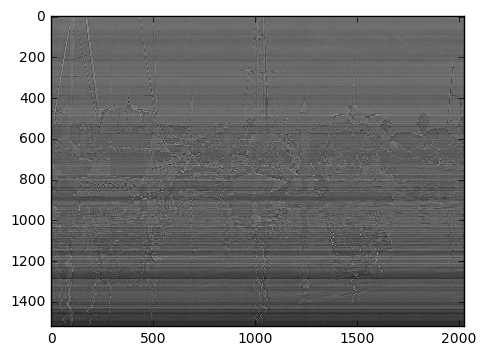

In [98]:
%matplotlib inline
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

def normalized(img): 
    return (img-np.mean(img))/float(np.std(img))

def ZCA(X):
    sigma = np.cov(X, rowvar=True) # Correlation matrix
    U,S,V = np.linalg.svd(sigma)# Singular Value Decomposition. X = U * np.diag(S) * V 
    epsilon = 0.1 # Whitening constant: prevents division by ezero
    ZCAMatrix = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T))     # ZCA Whitening matrix: U * Lambda * U'
    return np.dot(ZCAMatrix,X) #Data whitening

def preprocess(img):
    """
    Apply grayscale conversion, normalization and zca whitening
    """
    return zca(normalized(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY )))